Rocket equations
=================

So, the well known rocket equation, relating the $\Delta v$ induced by a rocket burn as a function of the exhaust velocity, $v_e$, and the initial and final masses of the rocket (including any remaining fuel and payload), $m_f$ and $m_i$, comes from observing that

$$\Delta v = \int_{m_f}^{m_i} \frac{v_e}{m} dm = v_e \ln{\frac{m_i}{m_f}} $$

Energy density of fuel
=================

This means that for fixed $v_e$, the initial mass of a rocket grows exponentially with the $\Delta v$ desired.  Which is an undesirable state of things.

A natural inclination is to try to get around this by increasing $v_e$.

But that has limitations as well.

Every imaginable fuel (even matter-antimatter) has some ratio of energy stored per unit mass.  Call this $R_e$

Once the energy is extracted from a piece of fuel, the remaining mass of the burnt fuel has little use except to shoot it out the back of the rocket as reaction mass (or, worse, carry along with the rocket as dead weight).

This gives us, at least for non-relativistic exhaust speeds, and negligible loss of mass through conversion to energy

$$ R_e (m_i - m_f) = \int_{m_f}^{m_i} \frac{1}{2} v_e^2 dm $$

Tying it together
===============

This is all well and good, and gives us an upper bound for $v_e$ for chemical rockets that have a constant exhaust velocity.  You can work it all out, tie it together, and figure out why constant $v_e$ chemical rockets have to be giant (and mostly consist of fuel) to achieve spaceflight $\Delta v$

But one can do more interesting things with these equations.

What if
================

What if we could independently schedule the release of spent fuel mass and spent fuel energy?
What if we could store part of the energy from burning a piece of fuel, and use it, later, to send a different piece of exhaust at a higher $v_e$ when it is more optimal to do so?  Conversely, what if we could save some of the spent fuel exhaust from burning a piece of fuel, impart all the energy onto a smaller piece of fuel exhaust, and launch that reaction mass later?

In short, what if we could make $v_e(m)$ a function of the mass remaining ($m$) ?

Those equations then become

$$ R_e (m_i - m_f) = \int_{m_f}^{m_i} \frac{1}{2} v_e^2(m) dm $$

which, if you notice, for fixed $m_i$, $m_f$ and $R_e$, constrain the inner product of $v_e(m)$ with itself.

And, subject to that, you, ideally, want to maximize

$$\Delta v = \int_{m_f}^{m_i} \frac{v_e(m)}{m} dm $$

But that's just the inner product of $v_e(m)$ with $\frac{1}{m}$ !

In short, the optimal schedule for $v_e$ as a function of the mass remaining, $m$, is to make $v_e$ proportional to the reciprocal of the total spacecraft remaining mass.

Let's solve it!!!
===============

Start with the first equation,

$$ R_e (m_i - m_f) = \int_{m_f}^{m_i} \frac{1}{2} v_e^2(m) dm $$

And assume $v_e(m) = \frac{k}{m}$ for some unknown $k$ that we're trying to solve for

$$ R_e (m_i - m_f) = \int_{m_f}^{m_i} \frac{1}{2} \frac{k^2}{m^2} dm  = \frac{k^2}{2} ( \frac{1}{m_f} - \frac{1}{m_i})$$

Or

$$k = \sqrt{ \frac{2 R_e (m_i - m_f)}{\frac{1}{m_f} - \frac{1}{m_i}}}$$



Which simplifies to $k = \sqrt{ 2 R_e m_i m_f}$

Now we want to solve

$$\Delta v = \int_{m_f}^{m_i} \frac{v_e(m)}{m} dm $$


with $v_e(m) = \frac{k}{m}$, which gets us

$$\Delta v = \int_{m_f}^{m_i} \frac{k}{m^2} dm = k ( \frac{1}{m_f} - \frac{1}{m_i})$$

$$\Delta v = k ( \frac{1}{m_f} - \frac{1}{m_i}) = k \frac{m_i - m_f}{m_i m_f}$$

$$ \Delta v = \sqrt{2 R_e m_i m_f} \frac{m_i - m_f}{m_i m_f} = (m_i - m_f) \sqrt{\frac{2 R_e} {m_i m_f}}$$

This looks comforting because we could multiply all the masses by, say, 10, and the $\Delta v$ would remain the same, just as it does with the classic rocket equation for constant $v_e$.  Lets work that one out next

In [2]:
from math import sqrt, log, exp

In [21]:
## Just for the heck of it, let's write a python function that computes delta v
## for an ideal-scheduled rocket as a function of m_f, m_i and Re

def deltav_optimal(m_i, m_f, Re, m_curr = None):
    """
    m_curr allows us to plan a burn schedule for a certain amount of fuel, and calculate velocity
    at any point along that burn trajectory
    """
    if m_curr is None:
        m_curr = m_f
    k = sqrt(2.0 * Re * m_i * m_f)
    return k * (1 / m_curr - 1/m_i)

Expression for constant exhaust velocity rocket
============================

Let's work this out for a constant velocity exhaust rocket.


Recall from earlier that 

$$ \Delta v = v_e \log{(\frac{m_i}{m_f})} $$ 

Now we just need to find $v_e$

We have

$$ R_e (m_i - m_f) = \int_{m_f}^{m_i} \frac{1}{2} v_e^2(m) dm $$

and, since $v_e$ is a constant, we just have

$$ R_e (m_i - m_f) = \frac{1}{2} v_e^2 (m_i - m_f) $$

or

$$ v_e = \sqrt{2 R_e} $$

That gives us 

$$ \Delta v = (\sqrt{2 R_e}) \log{(\frac{m_i}{m_f})} $$

In [25]:
## And we can calculate that in python too

def deltav_constant(m_i, m_f, Re, m_curr = None):
    """
    m_curr allows us to plan a burn schedule for a certain amount of fuel, and calculate velocity
    at any point along that burn trajectory
    """
    if m_curr is None:
        m_curr = m_f
    v_e = sqrt(2.0 * Re)
    return v_e * log(m_i / m_curr)

In [23]:
# Now that we have those calculations, let's plot velocity vs mass spent for both kinds of rockets
from matplotlib import pyplot as plt

Text(0, 0.5, 'Delta v')

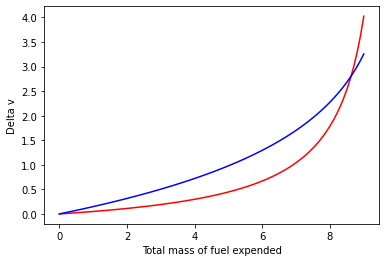

In [28]:
plt.plot([0.1 * i for i in range(91)], [deltav_optimal(10.0, 1.0, 1.0, 10.0 - 0.1 * i) for i in range(91)], 'r-')
plt.plot([0.1 * i for i in range(91)], [deltav_constant(10.0, 1.0, 1.0, 10.0 - 0.1 * i) for i in range(91)], 'b-')
plt.xlabel("Total mass of fuel expended")
plt.ylabel("Delta v")

Text(0, 0.5, 'Delta v')

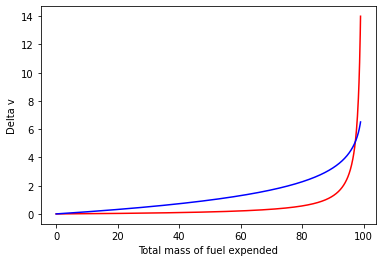

In [29]:
## That's for a fuel-payload ratio of 10 to 1.  What happens when it's 100 to 1?

plt.plot([0.1 * i for i in range(991)], [deltav_optimal(100.0, 1.0, 1.0, 100.0 - 0.1 * i) for i in range(991)], 'r-')
plt.plot([0.1 * i for i in range(991)], [deltav_constant(100.0, 1.0, 1.0, 100.0 - 0.1 * i) for i in range(991)], 'b-')
plt.xlabel("Total mass of fuel expended")
plt.ylabel("Delta v")

[10092.208262381673, 9072.152221635844]


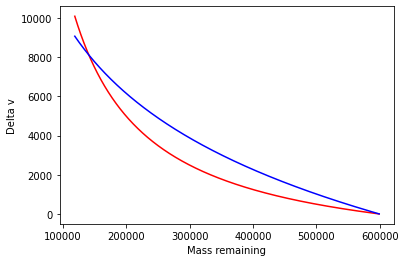

In [33]:
## Let's try with some physically plausible numbers

h_energy_density = 141.8e6 / 9  # 141.8e6 is from wikipedia, dividing by 18 is because we need to carry oxygen
# we need to carry 16 mass for every 2 mass of H2

saturn_v_booster_mass = 2.3e6
saturn_v_stage_2_mass = 0.48e6
saturn_v_stage_3_mass = 0.119e6

m_i = saturn_v_stage_3_mass + saturn_v_stage_2_mass
m_f = saturn_v_stage_3_mass

masses = [m_f + 0.001 * i * saturn_v_stage_2_mass for i in range(1001)]

plt.plot(masses, [deltav_optimal(m_i, m_f, h_energy_density, m) for m in masses], 'r-')
plt.plot(masses, [deltav_constant(m_i, m_f, h_energy_density, m) for m in masses], 'b-')
plt.xlabel("Mass remaining")
plt.ylabel("Delta v")
print(str([deltav_optimal(m_i, m_f, h_energy_density), deltav_constant(m_i, m_f, h_energy_density)]))

So under real-world plausible mass ratios, optimal vs constant $v_e$ doesn't matter *that* much!

But an extra $km/s$ would still be useful if it could be achieved.

Later we'll look into how feasible that might be, and how much energy we'd need to store in a rocketry scenario like this.

But first we'll compare these simulation numbers to the actual $\Delta v$ from the rocket this example was based on.

In [36]:
# Let's compare to the actual Saturn-V second stage delta v
vf_kmh = 25181
vi_ms = 2756
delta_v_m_per_s = (3600/1000) * vf_kmh - vi_ms
print("Achieved delta v from actual Saturn V stage 2 was " + str(delta_v_m_per_s))

Achieved delta v from actual Saturn V stage 2 was 87895.6


Huh, so our upper bound from the raw Tsiolkovsky equation wasn't that bad.

Comparison to billiard style collisions
-----------------------------

A natural question that might arise now is how this "optimal" schedule for $v_e(m)$ as a function of the mass remaining compares to a hypothetical "billiard ball" collision, in which the entire exhaust is ejected at once as a rigid body in a way that preserves total system momentum, and adds a kinetic energy of $R_e (m_i - m_f)$.

We calculate that below.

Here we let $v_r$ be the final velocity magnitude of the rocket, and abuse notation to use $v_e$ to denote the final velocity magnitude of the ejected exhaust (as if it were a rigid body)

Total energy in terms of $R_e$ and masses

$$ E = R_e (m_i - m_f) $$

Momentum balance

$$ m_f v_r = (m_i - m_f) v_e $$

Kinetic energy equals total energy

$$ \frac{1}{2} (m_i - m_f) v_e^2 + \frac{1}{2} m_f v_r^2 = R_e (m_i - m_f) $$

Gather terms by masses

$$ m_f v_r^2 = (m_i - m_f) (2 R_e - v_e^2) $$

$$ v_r = \sqrt{\frac{m_i - m_f}{m_f}} \sqrt{ 2 R_e - v_e^2} $$

which we can plug back in to the momentum balance equation for

$$ (m_i - m_f) v_e = m_f \sqrt{\frac{m_i - m_f}{m_f}} \sqrt{ 2 R_e - v_e^2} $$


$$ \sqrt{\frac{m_i - m_f}{m_f}} v_e =  \sqrt{ 2 R_e - v_e^2} $$

Well, now we have to square things again to get anything done

$$ (\frac{m_i - m_f}{m_f}) v_e^2 + v_e^2 = 2 R_e $$

$$ (\frac{m_i}{m_f}) v_e^2 = 2 R_e $$

$$ v_e = \sqrt{\frac{2 R_e m_f}{m_i}} $$

$$ v_r = \frac{m_i - m_f}{m_f} \sqrt{\frac{2 R_e m_f}{m_i}} $$

$$ v_r = (m_i - m_f) \sqrt{\frac{2 R_e }{m_i m_f}} $$

which is exactly what our optimal schedule of releasing mass and energy gave us.